General NetworkX introduction

In [22]:
import networkx as nx

# create Graph object
G = nx.Graph()

In [23]:
# add a node (hashable object)
G.add_node(1)
# or directly another Graph object as a node
G.add_node(nx.path_graph(10))

# add nodes from an iterable object like a list
G.add_nodes_from([2, 3])
# or directly from another graph
G.add_nodes_from(nx.path_graph(10))

In [24]:
# add an edge between two nodes with from and to or with a tuple
G.add_edge(1,2)
e = (1, 2)
G.add_edge(*e)
# add edges from an iterable object like a list
G.add_edges_from([(1,2), (2,3)])
# add a weighted edge
G.add_edge(2, 3, weight = 5)

In [25]:
# print the number of nodes in G
G.number_of_nodes()

11

In [26]:
# print the number of edges in G
G.number_of_edges()

2

In [27]:
# print the nodes list of G
list(G.nodes)

[1,
 2,
 3,
 0,
 4,
 5,
 6,
 7,
 8,
 9]

In [28]:
# print the edges list of G
list(G.edges)

[(1, 2), (2, 3)]

In [29]:
# print the adjacency list of the node 1
list(G.adj[1])

[2]

In [30]:
# print the number of edges incident to node 1
G.degree[1]

1

In [31]:
# remove a node
G.remove_node(list(G.nodes)[1])
list(G.nodes)

[1, 2, 3, 0, 4, 5, 6, 7, 8, 9]

In [32]:
# remove an edge
G.add_edge(4,5)
G.remove_edge(2,3)
list(G.edges)

[(1, 2), (4, 5)]

In [33]:
# create a directed graph starting from the undirected graph passed as argument
H = nx.DiGraph(G)
list(H.edges)

[(1, 2), (2, 1), (4, 5), (5, 4)]

In [34]:
# create a directed graph from an edges list
edge_list = [(0,1), (4,2), (2,1), (5,2), (1,3)]
G1 = nx.Graph(edge_list)
H1 = nx.DiGraph(edge_list)

Accessing edges and neighbors

In [37]:
# access the adjacency list of a node
G1.adj[2]

AtlasView({4: {}, 1: {}, 5: {}})

In [52]:
# set attributes of an edge using simple dictionary syntax
G1.add_edge(5,4)
G[5][4]['color'] = 'blue'
# add weights to edges
G[5][4]['weight'] = 4
G[2][1]['weight'] = 1

In [40]:
# create graph from a weighted edges list
G2 = nx.Graph()
weighted_edges_list = [(1,2,5), (4,2,1), (5,3,2), (5,1,6), (1,3,7)]
G2.add_weighted_edges_from(weighted_edges_list)

# loop on nodes for their adjacency lists
for n, neighbors in G2.adj.items():
    print(n, neighbors)

1 {2: {'weight': 5}, 5: {'weight': 6}, 3: {'weight': 7}}
2 {1: {'weight': 5}, 4: {'weight': 1}}
4 {2: {'weight': 1}}
5 {3: {'weight': 2}, 1: {'weight': 6}}
3 {5: {'weight': 2}, 1: {'weight': 7}}


In [42]:
# get all edges properties with a unique for loop
for (u, v, weight) in G2.edges.data('weight'):
    print(u, v, weight)

1 2 5
1 5 6
1 3 7
2 4 1
5 3 2


In [47]:
# add attributes to graphs
G2.graph['type'] = 'processing'
G2.graph

{'type': 'processing'}

In [49]:
# add attributes to nodes
G2.add_node(6, type = 'central')
G2.nodes[6]

{'type': 'central'}

In [56]:
# directed graphs provide additional properties
H2 = nx.DiGraph()
H2.add_weighted_edges_from(weighted_edges_list)
# information about outgoing edges of a node
H2.out_edges(1)

OutEdgeDataView([(1, 2), (1, 3)])

In [57]:
# information about ingoing edges of a node
H2.in_edges(2)

InEdgeDataView([(1, 2), (4, 2)])

In [59]:
# sums all the weights on the outgoing edges of a node
H2.out_degree(1, weight = 'weight')

12

In [62]:
# lists successors and neighbors of a node
list(H2.successors(1))
list(H2.neighbors(1))

[2, 3]

In [64]:
# converts a directed graph to an undirected one
G3 = nx.Graph(H2)

Mulitgraphs - graphs that allow multiple edges between any pair of nodes

In [70]:
# creates a multigraph
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1,2,3), (1,2,5), (2,3,1)])
dict(MG.degree(weight = 'weight'))

{1: 8, 2: 9, 3: 1}

In [74]:
# for every node in the adjacency list of every node, computes the minimum weight
GG = nx.Graph()
for n, neighbors in MG.adjacency():
    for neighbor, attributes in neighbors.items():
        min_value = min([d['weight'] for d in attributes.values()])
        GG.add_edge(n, neighbor, weight = min_value)
# compute the shortest path from 1 to 3
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

In [72]:
list(MG.adjacency())

[(1, {2: {0: {'weight': 3}, 1: {'weight': 5}}}),
 (2, {1: {0: {'weight': 3}, 1: {'weight': 5}}, 3: {0: {'weight': 1}}}),
 (3, {2: {0: {'weight': 1}}})]

Analyzing graphs

In [89]:
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (3,4), (2,4)])
G.add_node(5)

In [90]:
# compute the connected components in G
list(nx.connected_components(G))

[{1, 2, 3, 4}, {5}]

In [91]:
# compute the clustering in G
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

In [94]:
# shortest path between each pair of nodes, access a specific node with indexing
shortest_paths = dict(nx.all_pairs_shortest_path(G))
shortest_paths[3]

{3: [3], 1: [3, 1], 4: [3, 4], 2: [3, 1, 2]}

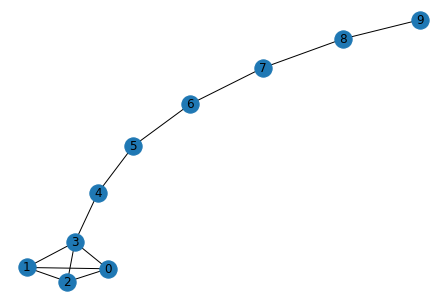

In [102]:
G = nx.lollipop_graph(4,6)
nx.draw(G, with_labels = True)

In [104]:
path_lengths = []
for node in G.nodes():
    # computing the shortest path length
    spl = dict(nx.single_source_shortest_path_length(G, node))
    # and for every path appending its length to an array
    for path in spl:
        path_lengths.append(spl[path])
    # output of the lengths
    print('{} {}'.format(node, spl))

0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7}
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7}
2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7}
3 {3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6}
4 {4: 0, 3: 1, 5: 1, 0: 2, 1: 2, 2: 2, 6: 2, 7: 3, 8: 4, 9: 5}
5 {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 0: 3, 1: 3, 2: 3, 8: 3, 9: 4}
6 {6: 0, 5: 1, 7: 1, 8: 2, 4: 2, 9: 3, 3: 3, 0: 4, 1: 4, 2: 4}
7 {7: 0, 8: 1, 6: 1, 9: 2, 5: 2, 4: 3, 3: 4, 0: 5, 1: 5, 2: 5}
8 {8: 0, 9: 1, 7: 1, 6: 2, 5: 3, 4: 4, 3: 5, 0: 6, 1: 6, 2: 6}
9 {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 0: 7, 1: 7, 2: 7}


In [105]:
# computing the average path length
sum(path_lengths) / len(path_lengths)

2.86

Drawing graphs - using matplotlib

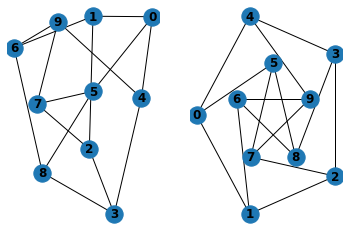

In [95]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels = True, font_weight = 'bold')
plt.subplot(122)
nx.draw_shell(G, nlist = [range(5,10), range(5)], with_labels = True, font_weight = 'bold')

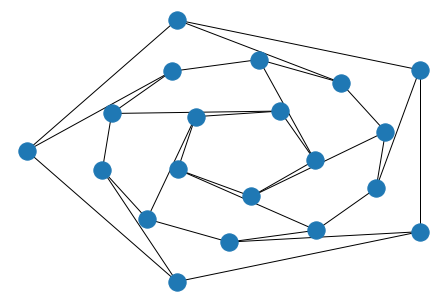

In [98]:
G = nx.dodecahedral_graph()
shells = [[2,3,4,5,6],[8,1,0,19,18,17,16,15,14,7],[9,10,11,12,13]]
nx.draw_shell(G, nlist = shells)

In [ ]:
# output as dot file for graphviz
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos = pos)
write_dot(G, 'file.dot')

Graph operations

In [ ]:
# classic graph operations:
# induced subgraph view of G on nodes in n_bunch
subgraph(G, n_bunch)
# graph union
union(G1, G2)
# graph union assuming all nodes are different
disjoint_union(G1, G2)
# cartesian product graph
cartesian_product(G1, G2)
# combine graphs identifying nodes common to both graphs
compose(G1, G2)
# graph complement
complement(G)
# return an empty copy of the same graph class
create_empty_copy(G)
# return an undirecred representation of G
to_undirected(G)
# return a direcred representation of G
to_directed(G)

Graph generators

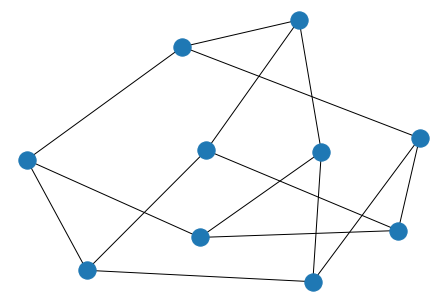

In [76]:
petersen = nx.petersen_graph()
nx.draw(petersen)

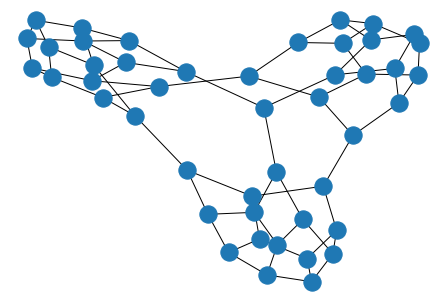

In [77]:
tutte = nx.tutte_graph()
nx.draw(tutte)

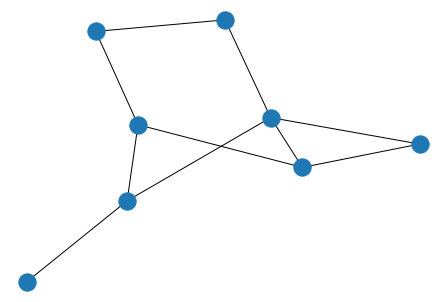

In [78]:
maze = nx.sedgewick_maze_graph()
nx.draw(maze)

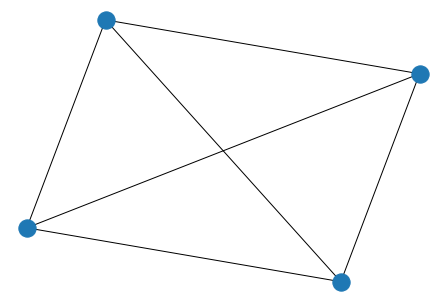

In [79]:
tet = nx.tetrahedral_graph()
nx.draw(tet)

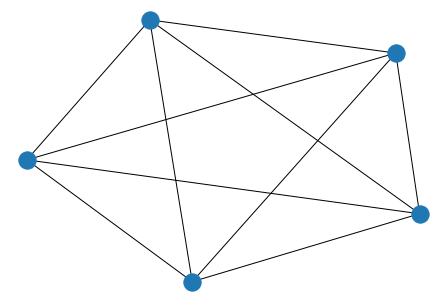

In [80]:
K_5 = nx.complete_graph(5)
nx.draw(K_5)

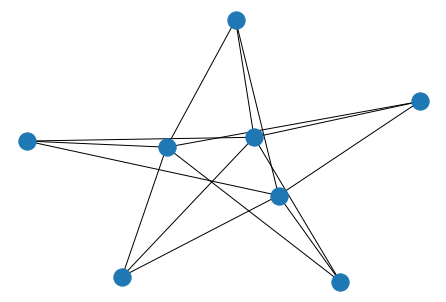

In [81]:
K_3_5 = nx.complete_bipartite_graph(3, 5)
nx.draw(K_3_5)

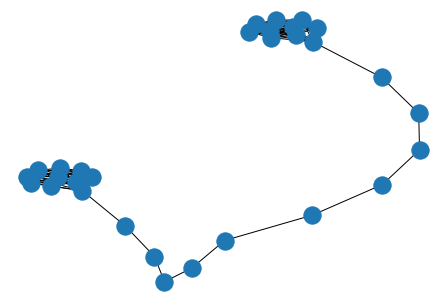

In [82]:
barbell = nx.barbell_graph(10, 10)
nx.draw(barbell)

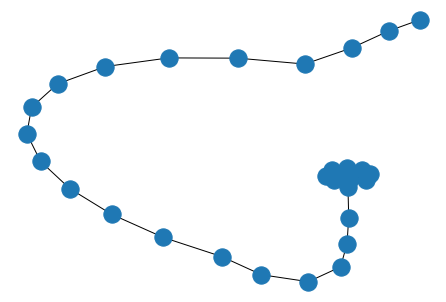

In [83]:
lollipop = nx.lollipop_graph(10, 20)
nx.draw(lollipop)

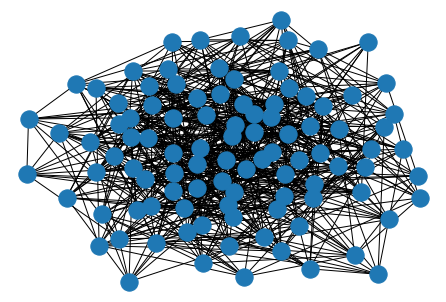

In [84]:
er = nx.erdos_renyi_graph(100, 0.15)
nx.draw(er)

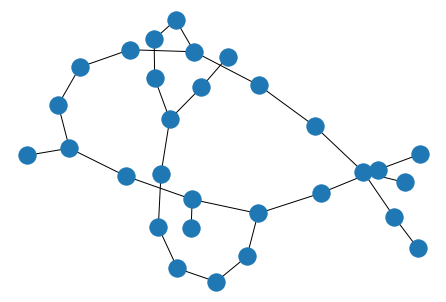

In [85]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)
nx.draw(ws)

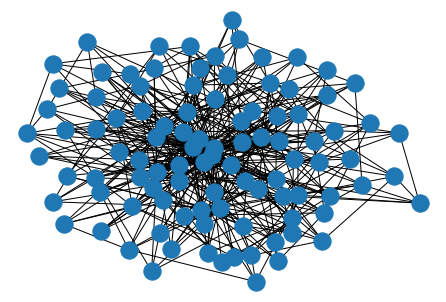

In [86]:
ba = nx.barabasi_albert_graph(100, 5)
nx.draw(ba)